Let's first load the required Pima Indian Diabetes dataset using the pandas' read CSV function. I have downloaded the data from the following link: https://www.kaggle.com/uciml/pima-indians-diabetes-database

LOADING DATA:

In [1]:
import pandas as pd
pima_d=pd.read_csv('S://PIMA__Diabetes__Dataset.csv')
pima_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now I have to break them into two separate columns one for dependent one i.e. y and and another for independent one i.e. X


SELECTING FEATURES TO BREK COLUMNS:

In [2]:
features=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X=pima_d[features]
y=pima_d.Outcome
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Now I have to split the dataset into train and test category by using sklearn.

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


MODEL DEVLOPMENT & PREDCTION:


First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [30]:
from sklearn.linear_model import LogisticRegression
logRegr=LogisticRegression(solver='lbfgs')
logRegr.fit(X_train,y_train)
y_pred=logRegr.predict(X_test)

C:\Users\This PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


MODEL EVALUATION USING CONFUSION MATRIX:


A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [31]:
from sklearn import metrics
cnf_m=metrics.confusion_matrix(y_test,y_pred)
cnf_m

array([[115,  15],
       [ 25,  37]], dtype=int64)

VISUALISING THE CONFUSION MATRIX USING HEATMAPS:

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Text(0.5, 15.0, 'Predicted label')

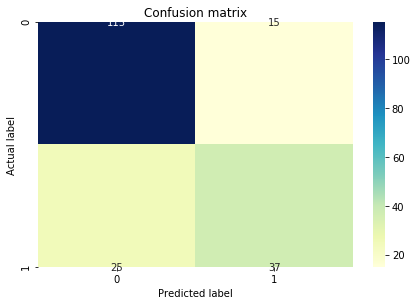

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sea.heatmap(pd.DataFrame(cnf_m), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Confusion Matrix Evaluation Metrics:

Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7916666666666666
